# Bulk silicon

## Prerequisites

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex

## Initialize Hamiltonian matrix

Here we compute energy spectra of a group of atoms using tight-binding method with no periodic boundary conditions applied.

As an example, we are going to compute energy spectrum for two coupled silicon atoms.

First one needs to specify basis sets for each atom kind used in the poject. There is an embeded library of basis functions for several atoms defined in the class `Orbitals()`: a basis set for Si atom is called `SiliocnSP3D5S`, and basis set `HydrogenS` for H atom. The library may be extended in future.

In [2]:
import nanonet.tb as tb
tb.Orbitals.orbital_sets = {'Si': 'SiliconSP3D5S'}

 _   _                   _   _      _   
| \ | | __ _ _ __   ___ | \ | | ___| |_ 
|  \| |/ _` | '_ \ / _ \|  \| |/ _ \ __|
| |\  | (_| | | | | (_) | |\  |  __/ |_ 
|_| \_|\__,_|_| |_|\___/|_| \_|\___|\__|
                                        

Vesion 1.1.5


Now the Hamiltonian matrix must be determined. The Hamiltonian matrix may be initialized in several ways. One of them is through the xyz-file determining positions if nodes/atoms.

In [3]:
xyz_file="""2
Si2 cell
Si1       0.0000000000    0.0000000000    0.0000000000
Si2       1.3750000000    1.3750000000    1.3750000000
"""

h = tb.Hamiltonian(xyz=xyz_file, nn_distance=2.5)

The verbosity level is 1
The radius of the neighbourhood is 2.5 Ang

---------------------------------

The xyz-file:
 2
Si2 cell
Si1       0.0000000000    0.0000000000    0.0000000000
Si2       1.3750000000    1.3750000000    1.3750000000

---------------------------------

Basis set 
 Num of species {'Si': 2} 


 Si 
title  | energy  | n | l | m  | s
-------+---------+---+---+----+--
s      | -2.0196 | 0 | 0 | 0  | 0
c      | 19.6748 | 1 | 0 | 0  | 0
px     | 4.5448  | 0 | 1 | -1 | 0
py     | 4.5448  | 0 | 1 | 1  | 0
pz     | 4.5448  | 0 | 1 | 0  | 0
dz2    | 14.1836 | 0 | 2 | -1 | 0
dxz    | 14.1836 | 0 | 2 | -2 | 0
dyz    | 14.1836 | 0 | 2 | 2  | 0
dxy    | 14.1836 | 0 | 2 | 1  | 0
dx2my2 | 14.1836 | 0 | 2 | 0  | 0
-------+---------+---+---+----+--
 
---------------------------------



The object `h` contains all information needed to build the tight-binding Hamiltonian. In order to actually compute the tight-binding Hamiltonian an additional command has to be invoked.
The `Hamiltonian()` can also accept a path to the xyz-file instead of a string containing formated data as has been done above.

Now we are ready to compute the Hamiltonian matrix:

In [4]:
h.initialize()

Radial dependence function: None

---------------------------------

Discrete radial dependence function: None

---------------------------------

Unique distances: 
    2.3816 Ang between atoms Si and Si
---------------------------------



One may access the resuted Hamiltonian matrix and visualize it.

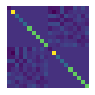

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(1.5, 1.5))
plt.axis('off')
plt.imshow(np.real(h.h_matrix))
plt.show()

## Set periodic boundary conditions

The previous computations can be extended adding periodic boundary conditions which are specified by the basis vectors of the primitive cell. If the translation symmetry is in all three dimentions, three primitive lattice basis vectors must be specified.

In [6]:
a_si = 5.50
PRIMITIVE_CELL = [[0, 0.5 * a_si, 0.5 * a_si],
                  [0.5 * a_si, 0, 0.5 * a_si],
                  [0.5 * a_si, 0.5 * a_si, 0]]

Having the primitive cell basis vectors, the periodic boundary conditions can be added to the problem by the help of the member function of the previously crated object `h` of the class `Hamiltonian()`

In [7]:
h.set_periodic_bc(PRIMITIVE_CELL)

Primitive_cell_vectors: 
 [[0, 2.75, 2.75], [2.75, 0, 2.75], [2.75, 2.75, 0]] 

---------------------------------



## Generate a set of wave vector coordinates

In order to diagonalize the Hamiltonian matrix, one has to define a set of wave vectors for which the matrix diagoalizaion will be performed. There are several ways to genegate the array of k-points. Here we show the one realized be specifying a path in the Brillouine zone through a number of high-symmentry points.

In [8]:
from nanonet.tb import get_k_coords

sym_points = ['L', 'GAMMA', 'X', 'W', 'K', 'L', 'W', 'X', 'K', 'GAMMA']
num_points = [15, 20, 15, 10, 15, 15, 15, 15, 20]
k = get_k_coords(sym_points, num_points, 'Si')


## Computing band structure of bulk silicon

The matrix diagonalization is performed in a loop for each k-point.

In [9]:
vals = np.zeros((sum(num_points), h.h_matrix.shape[0]), dtype=complex)

for jj, item in enumerate(k):
    vals[jj, :], _ = h.diagonalize_periodic_bc(item)


## Visualize

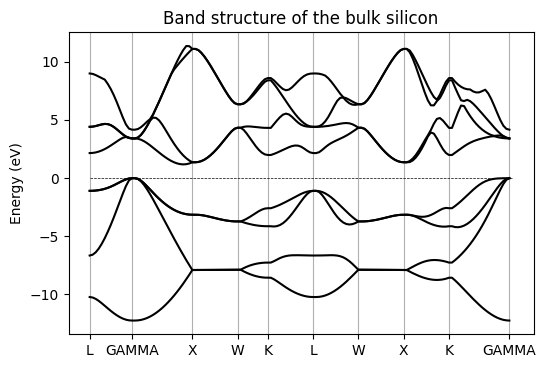

In [10]:
plt.figure(dpi=100)
ax = plt.axes()
ax.set_title('Band structure of the bulk silicon')
ax.set_ylabel('Energy (eV)')
ax.plot(np.sort(np.real(vals))[:, :8], 'k')
ax.plot([0, vals.shape[0]], [0, 0], '--', color='k', linewidth=0.5)
plt.xticks(np.insert(np.cumsum(num_points)-1,0,0), labels=sym_points)
ax.xaxis.grid()
plt.show()